#  Deep Learning and Image Recognition

## Convolution

### Apply convolutions to arrays, functions and images

In [1]:
import numpy as np
from scipy import ndimage, signal as sg
from skimage import data, filters, io, color
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [2]:
#Default value for color map is "jet", change to gray 
plt.rcParams["image.cmap"] = "gray"
#change default nterpolation tp nearest
plt.rcParams["image.interpolation"] = "nearest"

### 1d convolution - NumPy

In [3]:
f =[1,5,2,4]
g=[2,3,1]

In [4]:
#Convolution operator flips the second array before “sliding” the two across one another.
np.convolve(f, g, "full")

array([ 2, 13, 20, 19, 14,  4])

In [5]:
#Only two position where they completely overlap: in the center
np.convolve(f, g, "valid") 

array([20, 19])

In [6]:
#Only return the middle values of the convolution: leave edges alone
np.convolve(f, g, "same")

array([13, 20, 19, 14])

### 2d convolution - Scipy

In [5]:
sg.convolve([[255, 7, 3],[212, 240, 4],[218, 216, 230]],[[2, -1]], "valid")

array([[-241,   -1],
       [ 268, -232],
       [ 214,  244]])

### Signal convolution

Convolve a signal with a square pulse: bend og the waves

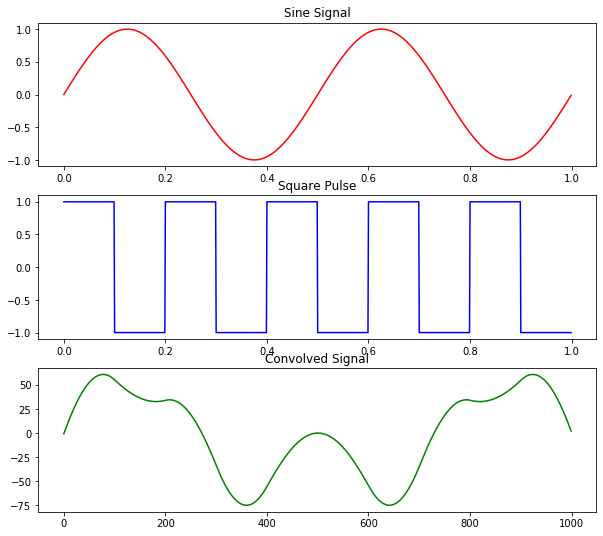

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,9))

t = np.linspace(0, 1, 1000, endpoint=False)
#sine wave
y = np.sin(2*2*np.pi*t)
ax1.plot(t, y, 'r')
ax1.set_title('Sine Signal')

#square pulse
ts = sg.square(2 * np.pi * 5 * t)
ax2.plot(t, ts, 'b')
ax2.set_title('Square Pulse')

#convolved output
ax3.plot(sg.convolve(y ,ts, "same"),'g')
ax3.set_title('Convolved Signal')
plt.show()

### Gaussian Convolution

The Gaussian smoothing operator is a 2-D convolution operator as a point-spread function. It is used to "blur" images and remove details and noise. It is similar to the mean filter, but it uses a different kernel that represents the shape of a Gaussian hump. 

The Gaussian outputs a weighted average of each pixel's neighborhood, with the average weighted more towards the value of the central pixels. This is in contrast to the mean filter's uniformly weighted average. Because of this, a Gaussian provides gentler smoothing and preserves edges better than a similarly sized mean filter.  

(140, 140)


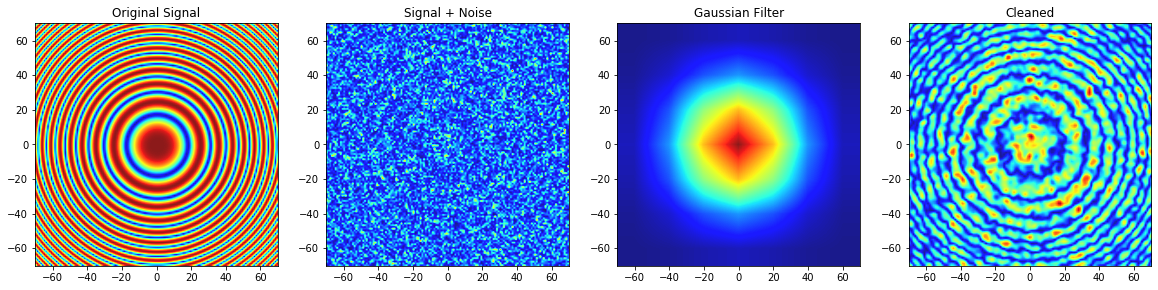

In [7]:
#create the kernal
def gauss_kern(size, sizey=None):
    """ Returns a normalized 2D gauss kernel array for convolutions """
    size = int(size)    
    if not sizey:
        sizey = size
    else:
        sizey = int(sizey)               
    #print size, sizey    
    x, y = np.mgrid[-size:size+1, -sizey:sizey+1]
    g = np.exp(-(x**2/float(size)+y**2/float(sizey)))
    return g / g.sum()

#convole the kernal with input
def blur_image(im, n, ny=None) :
    """ blurs the image by convolving with a gaussian kernel of typical
        size n. The optional keyword argument ny allows for a different
        size in the y direction.
    """
    g = gauss_kern(n, sizey=ny)
    improc = sg.convolve(im,g, mode='valid')
    return(improc)    


xmin, xmax, ymin, ymax = -70, 70, -70, 70
extent = xmin, xmax, ymin, ymax

X, Y = np.mgrid[-70:70, -70:70]
print (X.shape)

#circlular rings:
Z1 = np.cos((X**2+Y**2)/200.)

#circlular rings + gausian noise
Z2 = np.cos((X**2+Y**2)/200.)+ np.random.normal(size=X.shape)    

#Plot the images
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 8))

#Original Signal
ax1.imshow(abs(Z1), cmap=cm.jet, alpha=0.9, interpolation='bilinear', extent=extent)
ax1.set_title(r'Original Signal')

#Signal with Noise
ax2.imshow(abs(Z2), cmap=cm.jet, alpha=.9, interpolation='bilinear', extent=extent)
ax2.set_title(r'Signal + Noise')

#Gausian Kernel
P = gauss_kern(3)
ax3.imshow(abs(P), cmap=cm.jet, alpha=.9, interpolation='bilinear', extent=extent)
ax3.set_title(r'Gaussian Filter')

#Blurred Image recovery after applying Gausian Kernel
U = blur_image(Z2, 3)
ax4.imshow(abs(U), cmap=cm.jet, alpha=.9, interpolation='bilinear', extent=extent)
ax4.set_title(r'Cleaned')

plt.show()

### Convolution applied to images

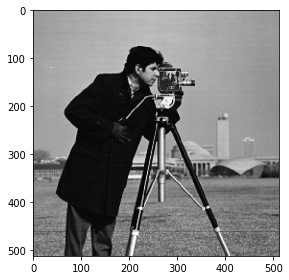

In [8]:
image = data.camera()
io.imshow(image)
io.show()

### Smooth 1 Kernel

The blur or smooth kernel de-emphasizes differences in adjacent pixel values

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


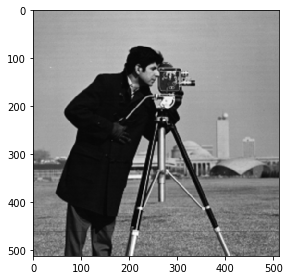

In [9]:
#What do the numbers in the following convolution kernel tell about it ?
#weighted average kernal
smooth_kernel = np.array([[1/16,1/8,1/16],[1/8,1/4,1/8],[1/16,1/8,1/16]])
print(smooth_kernel)
image1 = ndimage.convolve(image, smooth_kernel, cval=1.0)
io.imshow(image1)
io.show()

### Smooth 2 Kernel

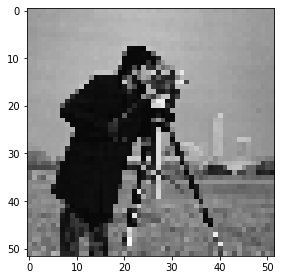

In [12]:
pixelated = image[::10, ::10]
io.imshow(pixelated)
io.show()

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


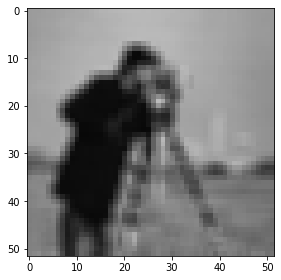

In [13]:
mean_kernel = 1.0/9.0 * np.ones((3, 3))
print (mean_kernel)
image2 = ndimage.convolve(pixelated, mean_kernel, cval=1.0)
io.imshow(image2)
io.show()

### Edge Detection Kernel

[[-0.125 -0.125 -0.125]
 [-0.125  1.    -0.125]
 [-0.125 -0.125 -0.125]]


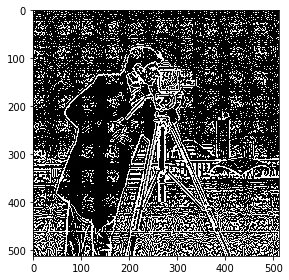

In [14]:
#edge_kernel = np.array([[-1,-1,-1],[-1,7,-1],[-1,-1,-1]])
edge_kernel = np.array([[-1/8,-1/8,-1/8],[-1/8,1,-1/8],[-1/8,-1/8,-1/8]])
print(edge_kernel)
image3 = ndimage.convolve(image, edge_kernel, cval=1.0)
io.imshow(image3)
io.show()

Here we hard code by oursevles, sobel uses 2 kernals side by side instead.

### Emboss Kernel

The emboss kernel (similar to the sobel kernel) givens the illusion of depth by emphasizing the differences of pixels in a given direction

[[ 2  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]


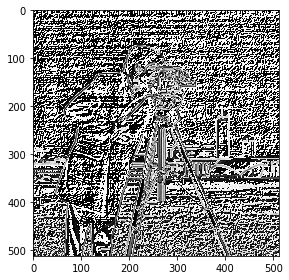

In [15]:
emboss_kernel = np.array([[2,0,0],[0,-1,0],[0,0,-1]])
print(emboss_kernel)
image4 = ndimage.convolve(image, emboss_kernel, cval=1.0)
io.imshow(image4)
io.show()

### Sharpen kernel

The sharpen kernel emphasizes differences in adjacent pixel values.

[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


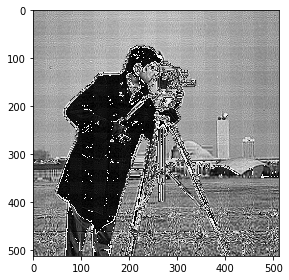

In [16]:
sharp_kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
print(sharp_kernel)
image5 = ndimage.convolve(image, sharp_kernel)
io.imshow(image5)
io.show()